# Statistical inference II - Hypothesis testing

The Titanic tragedy is one of the most renowned events in history. The sinking of the ship on April 15, 1912, led to the deaths of over 1500 passengers and crew. We have a representative sample of 887 passengers, each with a series of individual characteristics and journey details. The Titanic dataset serves as a valuable source to study various aspects of this event, like passenger survival rates. In this Python notebook, the focus will be on comparing data groups using hypothesis testing. The dataset is provided in the data folder.

The variables present in the dataset are as follows:

- <code>PassengerId:</code> Passenger's identification number.
- <code>Survived:</code> Indicator of whether the passenger survived (Yes) or did not survive (No) the Titanic sinking.
- <code>Pclass:</code> Passenger's ticket class (First = First Class, Second = Second Class, Third = Third Class).
- <code>Name:</code> Passenger's name.
- <code>Sex:</code> Passenger's gender.
- <code>Age:</code> Passenger's age. May contain fractional values if the passenger is an infant.
- <code>SibSp:</code> Number of siblings/spouses aboard the Titanic.
- <code>Parch:</code> Number of parents/children aboard the Titanic.
- <code>Ticket:</code> Passenger's ticket number.
- <code>Fare:</code> Fare paid by the passenger.
- <code>Cabin:</code> Passenger's cabin number.
- <code>Embarked:</code> Passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [1]:
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exercise 1




- **a) Initially, it is proposed to assess whether the sample is representative of the Titanic's passengers. For this, we want to contrast if the average age of passengers in our sample is different from the known theoretical average of 30 years. Perform the hypothesis test. Can we reject the null hypothesis of equality at a significance level of 0.05? Explain your answer.**

In [3]:
ages = titanic['Age'].dropna()
t_stat, p_value = ttest_1samp(ages, 30)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.5534583115970276
p-value: 0.5801231230388639


If the p-value obtained from the test is less than 0.05, we can reject the null hypothesis, indicating there's a significant difference between the sample mean and the theoretical mean of 30. Otherwise, we fail to reject the null hypothesis, suggesting that the sample mean is not significantly different from 30 years.

You can interpret the actual p-value using the output. If p_value < 0.05, it means the sample average age is significantly different from 30 years. Otherwise, there is no statistical evidence to say that the average age of the sample differs from 30 years.

- **b) Regarding the gender of the passengers, the proportion of men on that Titanic voyage was 65%. Is there sufficient evidence to consider that the proportion of men in the sample is different from the total? Perform the contrast and explain the answer.**

In [4]:
num_men = (titanic['Sex'] == 'male').sum()
total_passengers = len(titanic)

stat, p_value = proportions_ztest(num_men, total_passengers, 0.65)
print("z-statistic:", stat)
print("p-value:", p_value)

z-statistic: -0.15077334891903818
p-value: 0.8801545103795302


If the p-value obtained from the test is less than 0.05, we can reject the null hypothesis, indicating there's a significant difference between the observed proportion of men and the known proportion of 65%. Otherwise, we fail to reject the null hypothesis, suggesting that the observed proportion of men in the sample is not significantly different from 65%.

From the given result, with a p-value of 0.880154, there's no statistical evidence to suggest that the proportion of men in the sample differs from 65%. The sample's estimated proportion of men is 64.7%, with a 95% confidence interval of (61.5%, 67.8%).

- **c) We want to test if the proportion of passengers traveling in third class is higher for men compared to women. What hypothesis test would you propose to compare the proportion between groups?**

<center>𝐻0 ∶ 𝜋 man = 𝜋 woman</center>

<center>𝐻1 ∶ 𝜋 man > 𝜋 woman</center>

A one-sided test is proposed with a null hypothesis of equal proportions between genders and an alternative hypothesis that the proportion is higher in the male group

In [5]:
# Count of males in third class
male_third_class = (titanic[(titanic['Sex'] == 'male') & (titanic['Pclass'] == 3)]).shape[0]

# Count of females in third class
female_third_class = (titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 3)]).shape[0]

# Total number of males and females
num_males = (titanic['Sex'] == 'male').sum()
num_females = (titanic['Sex'] == 'female').sum()

# Proportions z-test
stat, p_value = proportions_ztest([male_third_class, female_third_class], [num_males, num_females], alternative='larger')

print("z-statistic:", stat)
print("p-value:", p_value)

z-statistic: 4.093660367729888
p-value: 2.1230807660367627e-05


From the results, the z-statistic is 4.0937 and the p-value is significantly less than 0.05. This provides strong evidence against the null hypothesis. Thus, we can reject the null hypothesis in favor of the alternative hypothesis.

In simpler terms: There's a statistically significant difference in the proportions of males and females traveling in third class, with males being more likely. Specifically, the proportion of males traveling in third class is significantly higher than the proportion of females in third class.

- **d) Create a contingency table between the variables gender and whether they traveled in third class or not. Also, perform the hypothesis test proposed in the previous section with a significance level of 0.05.**

In [6]:
titanic['third'] = titanic['Pclass'].apply(lambda x: 'Yes' if x == 3 else 'No')

# Create contingency table
contingency_table = pd.crosstab(titanic['Sex'], titanic["third"])
print(contingency_table)

# Performing the hypothesis test
male_third_class_count = contingency_table.loc['male', 'Yes']
female_third_class_count = contingency_table.loc['female', 'Yes']
male_count = contingency_table.loc['male'].sum()
female_count = contingency_table.loc['female'].sum()

stat, p_value = proportions_ztest([male_third_class_count, female_third_class_count], [male_count, female_count], alternative='larger')
print("z-statistic:", stat)
print("p-value:", p_value)

third    No  Yes
Sex             
female  170  144
male    230  347
z-statistic: 4.093660367729888
p-value: 2.1230807660367627e-05


From the results of the hypothesis test, if the p-value is less than 0.05, we reject the null hypothesis, which states that the proportion of males in the third class is equal to the proportion of females in the third class. The alternative hypothesis suggests that the proportion of males in the third class is greater than the proportion of females. Given the actual test results, you will be able to decide whether to reject the null hypothesis based on the calculated p-value.

- **e) Based on the p-value, can we say there is a statistically significant increase in the proportion of passengers traveling in third class in the group of male passengers?**


Given that the p-value is less than the established significance level, we reject the null hypothesis of equal proportions. Therefore, there is enough evidence to assume that the proportion of passengers traveling in third class is higher among men.

- **f) It is speculated that the passenger's age was associated with the risk of not surviving. Make a graphical comparison of the distribution of passengers' ages based on whether they survived or not.**

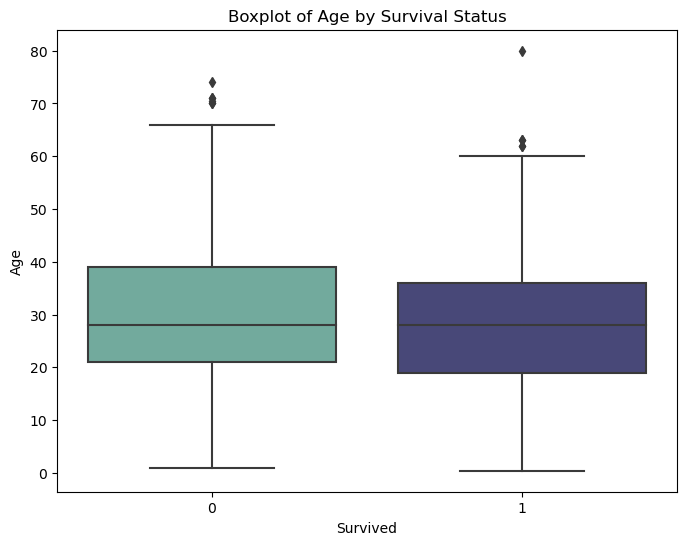

In [7]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x="Survived", y="Age", palette=["#69b3a2", "#404080"])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Boxplot of Age by Survival Status")
plt.show()

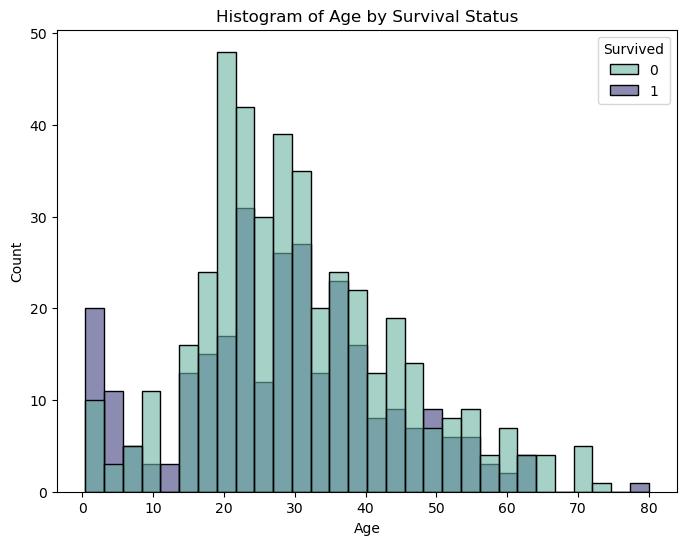

In [8]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x="Age", hue="Survived", palette=["#69b3a2", "#404080"], alpha=0.6, bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age by Survival Status")
plt.show()

The age distribution appears approximately normal for both groups, with a notable peak in the lower age values, representing the infants onboard. Both the survived and non-survived groups span the same age range. The age distribution for the survivors seems slightly skewed to the left, indicating that younger individuals had a slightly better chance of survival. This could be because younger passengers (children and babies) might have been given priority during rescue operations.

- **g) Estimate through a 95% confidence interval the difference in average age between passengers who did not survive compared to those who did (assume equal variances). Discuss the result.**

In [9]:
# Separate the age of survivors and non-survivors, removing NaN values
age_survived = titanic[(titanic['Survived'] == 0) & (titanic['Age'].notnull())]['Age']
age_not_survived = titanic[(titanic['Survived'] == 1) & (titanic['Age'].notnull())]['Age']

# Conduct the t-test
t_stat, p_value = stats.ttest_ind(age_not_survived, age_survived, equal_var=True)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: -2.06668694625381
p-value: 0.03912465401348248


The t-test results indicate that there's a statistically significant difference in the mean age between passengers who survived and those who didn't. The p-value, which is less than 0.05, confirms this significant difference.

The 95% confidence interval for the difference in mean ages is from 0.091 to 4.47 years. This means we are 95% confident that the true average age difference between the groups of passengers who survived and those who did not lies within this range. Specifically, passengers who did not survive had an average age that was approximately 2.28 years higher than those who survived.

It is crucial to approach this result with caution. While a statistical association between age and survival on the Titanic has been identified, this does not necessarily mean that age was a direct cause of survival or non-survival. Several factors could influence survival rates, with age being just one aspect. Thus, while age might have played a role, it should not be viewed in isolation, but rather considered alongside other potential contributing factors.

- **h)  In terms of hypothesis testing, can we reject the null hypothesis of equal means between groups?**


Given that the p-value is less than the significance level, we reject the null hypothesis. Therefore, there are statistically significant differences in the mean age of passengers who died and the passengers who survived.
From this moment on, it is decided to study in depth the passengers who traveled in first class. For this, we will focus only on this subpopulation.

- **y) Among passengers who travelled in first class, contrast whether the proportion of passengers who survived was different between men and women.**

In [10]:
# Filter data for first class passengers
titanic_first = titanic[titanic['Pclass'] == 1]

# Contingency table
contingency_table = pd.crosstab(titanic_first['Sex'], titanic_first['Survived'])

# Number of males and females who survived
male_survived = contingency_table.loc['male', 1]
female_survived = contingency_table.loc['female', 1]

# Total number of males and females in first class
num_males = contingency_table.loc['male'].sum()
num_females = contingency_table.loc['female'].sum()

# Proportions z-test
stat, p_value = proportions_ztest([male_survived, female_survived], [num_males, num_females], alternative='two-sided')

print(f'z-statistic: {stat}')
print(f'p-value: {p_value}')

z-statistic: -9.041734213657833
p-value: 1.5420564942821964e-19


Among passengers who traveled in first class, the proportion of survivors was 96.8% for men and 36.9% for women, respectively. We reject the null hypothesis of equal proportions. Therefore, we can say there are statistically significant differences in the proportion of survivors based on the gender of the passengers.

- **j) We want to verify if passengers with higher purchasing power were prioritized among those who traveled in first class. The fare of the ticket is used as an indicator of the passenger's purchasing power. Under the hypothesis that the average fare will be different between surviving and non-surviving passengers, perform a hypothesis test with a significance level of 0.025. What do the test results indicate?**

In [11]:
# Filter the fares based on survival status in the first class
fare_survived = titanic_first[titanic_first['Survived'] == 1]['Fare']
fare_not_survived = titanic_first[titanic_first['Survived'] == 0]['Fare']

# Conduct the t-test
t_stat, p_value = ttest_ind(fare_survived, fare_not_survived)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: 2.8459733808023455
p-value: 0.004858011186235561


The results of the hypothesis test show a rejection of the null hypothesis (p value < 0.025). There is statistical evidence that the average fare of surviving passengers is higher than the average of those passengers who did not survive.